In [20]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import pandas as pd
import time

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [19]:
# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     print(dirname)

## Load data

In [2]:
batch_size = 32
img_height = 32  #all img in our dataset are of 32x32 default
img_width = 32

In [24]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    "/kaggle/input/devanagari-character-dataset-large/dhcd/train",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    color_mode='grayscale'
)

Found 78200 files belonging to 46 classes.


In [29]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    "/kaggle/input/devanagari-character-dataset-large/dhcd/test",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    color_mode='grayscale'
)

Found 13800 files belonging to 46 classes.


In [30]:
class_names = train_ds.class_names
print(class_names)

['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '5', '6', '7', '8', '9']


### Reading labels csv file
This file contains the mapping of above class_names with the actual names of the character

In [31]:
labels_csv = pd.read_csv("/kaggle/input/devanagari-character-dataset-large/labels.csv")
labels_csv.tail()

,Class,Label,Devanagari label,Phonetic,Type
41,41,patalosaw,स,sa,CONSONANT
42,42,ha,ह,ha,CONSONANT
43,43,ksha,क्ष,kṣa,CONSONANT
44,44,tra,त्र,tra,CONSONANT
45,45,gya,ज्ञ,jña,CONSONANT


In [32]:
labels_csv.loc[45, 'Devanagari label']

'ज्ञ'

(32, 32, 1)
फ
(32, 32, 1)
५
(32, 32, 1)
५
(32, 32, 1)
२
(32, 32, 1)
ड
(32, 32, 1)
झ
(32, 32, 1)
ण
(32, 32, 1)
७
(32, 32, 1)
४


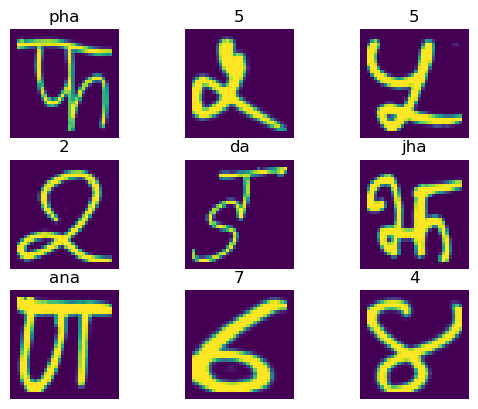

In [36]:
import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
#     print(images[i].numpy().astype("uint8").shape)
#     print(labels[i])    #folder ko index print garxa
#     plt.title(class_names[labels[i]]) #folder ko naam print garxa
    class_name = int(class_names[labels[i]])
    print(labels_csv.loc[class_name, 'Devanagari label'])
    plt.title(labels_csv.loc[class_name, 'Label'])
    plt.axis("off")

## Configure the dataset for performance

In [37]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

## Creating Model

In [43]:
num_classes = len(class_names)

model = Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 1)),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),
    
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),
    
    
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(num_classes, activation='linear')
])

In [44]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 32, 32, 1)         0         
                                                                 
 conv2d_20 (Conv2D)          (None, 32, 32, 32)        320       
                                                                 
 conv2d_21 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 dropout_15 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_22 (Conv2D)          (None, 16, 16, 64)        18496     
                                                      

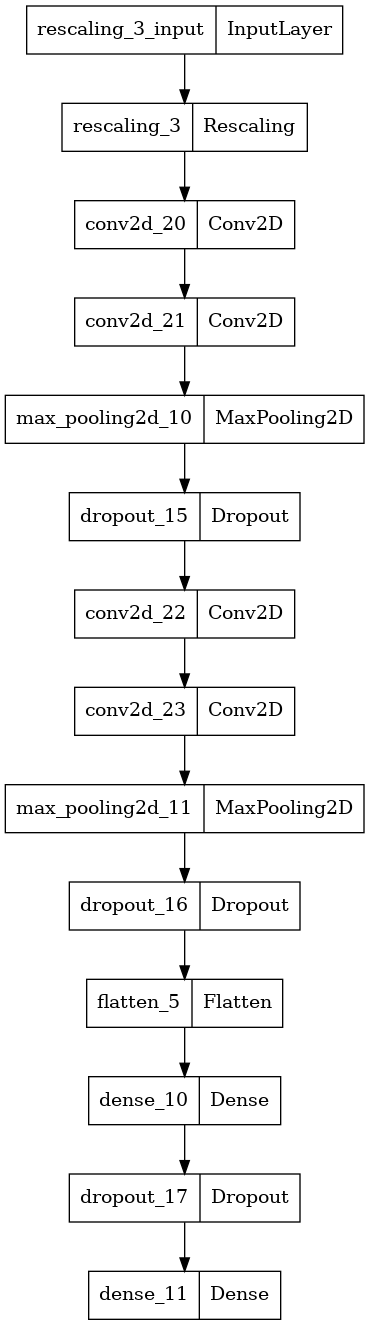

In [45]:
keras.utils.plot_model(model, "nepali_ocr_model.png")

## Compiling the Model

In [46]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Train the Model

In [47]:
epochs=10
time1 = time.time()

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)
time2 = time.time()

print("Train time = ", (time2-time1)/60, "min")

Epoch 1/10
2444/2444 [==============================] - 293s 116ms/step - loss: 0.4949 - accuracy: 0.8567 - val_loss: 0.1101 - val_accuracy: 0.9669
Epoch 2/10
2444/2444 [==============================] - 258s 106ms/step - loss: 0.1440 - accuracy: 0.9552 - val_loss: 0.0753 - val_accuracy: 0.9779
Epoch 3/10
2444/2444 [==============================] - 258s 106ms/step - loss: 0.0991 - accuracy: 0.9690 - val_loss: 0.0613 - val_accuracy: 0.9812
Epoch 4/10
2444/2444 [==============================] - 257s 105ms/step - loss: 0.0775 - accuracy: 0.9750 - val_loss: 0.0562 - val_accuracy: 0.9834
Epoch 5/10
2444/2444 [==============================] - 258s 105ms/step - loss: 0.0666 - accuracy: 0.9790 - val_loss: 0.0436 - val_accuracy: 0.9865
Epoch 6/10
2444/2444 [==============================] - 257s 105ms/step - loss: 0.0545 - accuracy: 0.9821 - val_loss: 0.0481 - val_accuracy: 0.9858
Epoch 7/10
2444/2444 [==============================] - 257s 105ms/step - loss: 0.0491 - accuracy: 0.9844 - val_

## Visualize training results
Create plots of the loss and accuracy on the training and validation sets:

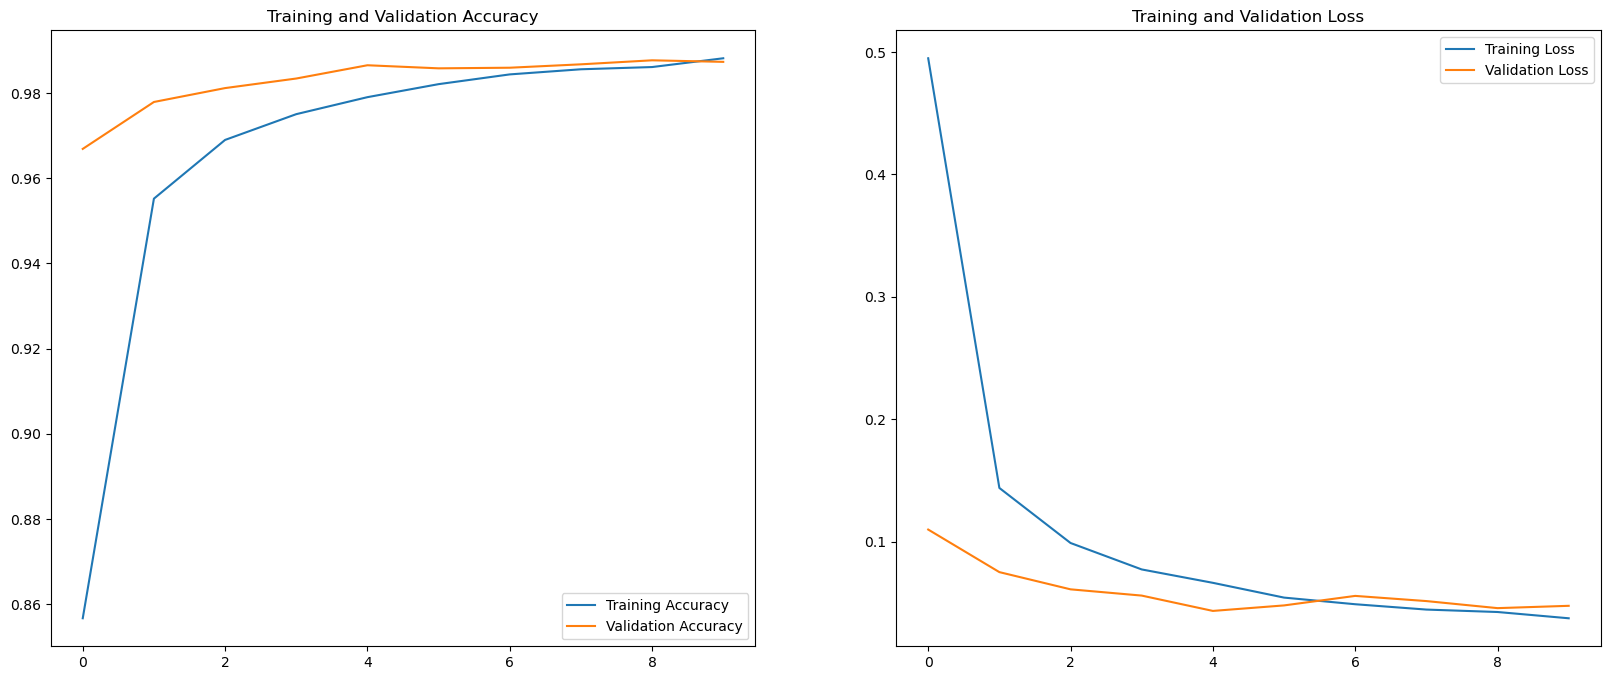

In [50]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Saving the Model

In [51]:
# Save the entire model as a SavedModel.
!mkdir -p saved_model
model.save('saved_model/my_model_ocr')

### Reload a fresh Keras model from the saved model:

In [54]:
new_model1 = tf.keras.models.load_model('/kaggle/working/saved_model/my_model_ocr')

# Check its architecture
new_model1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 32, 32, 1)         0         
                                                                 
 conv2d_20 (Conv2D)          (None, 32, 32, 32)        320       
                                                                 
 conv2d_21 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 dropout_15 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_22 (Conv2D)          (None, 16, 16, 64)        18496     
                                                      

### Saving in HDF5 format
Keras provides a basic save format using the HDF5 standard.

In [55]:
model.save('my_model.h5')

In [56]:
# Recreate the exact same model, including its weights and the optimizer
new_model2 = tf.keras.models.load_model('/kaggle/working/my_model.h5')

# Show the model architecture
new_model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 32, 32, 1)         0         
                                                                 
 conv2d_20 (Conv2D)          (None, 32, 32, 32)        320       
                                                                 
 conv2d_21 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 dropout_15 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_22 (Conv2D)          (None, 16, 16, 64)        18496     
                                                      

### Now lets check if our loaded model performs as it didi on test set earlier on training.

1/1 [==============================] - 0s 26ms/step
Actual- ध   Prediction- ध
1/1 [==============================] - 0s 25ms/step
Actual- ष   Prediction- ष
1/1 [==============================] - 0s 25ms/step
Actual- ह   Prediction- ह
1/1 [==============================] - 0s 25ms/step
Actual- ह   Prediction- ह
1/1 [==============================] - 0s 25ms/step
Actual- फ   Prediction- फ
1/1 [==============================] - 0s 26ms/step
Actual- ट   Prediction- ट
1/1 [==============================] - 0s 25ms/step
Actual- थ   Prediction- थ
1/1 [==============================] - 0s 25ms/step
Actual- ठ   Prediction- ठ
1/1 [==============================] - 0s 26ms/step
Actual- ण   Prediction- ण


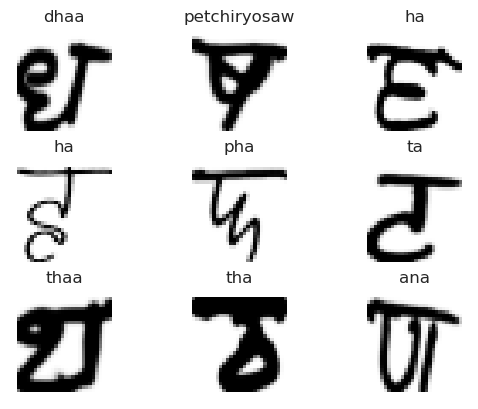

In [68]:
plt.style.use('seaborn-whitegrid')
# r=3
# c=3
# fig = plt.figure(figsize=(20, 20))
# for i in range(r*c):
#     plt.subplot(r, c, i+1)
#     lbl = val_ds[i][1][i]
#     img = val_ds[i][0][i]
#     img = img.reshape(1, 32, 32, 1)
#     prediction = model.predict(img)
#     prediction = np.argmax(prediction)
#     title = f"Pred: {classes[prediction]} Real: {classes[np.argmax(lbl)]}"
#     plt.title(title)
#     plt.imshow(img.reshape(32, 32))
# plt.show()

for images, labels in val_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    img = images[i].numpy().astype("uint8")
    plt.imshow(img)
#     print(images[i].numpy().astype("uint8").shape)
#     print(labels[i])    #folder ko index print garxa
#     plt.title(class_names[labels[i]]) #folder ko naam print garxa
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    class_name = int(class_names[labels[i]])
    
    predictions = new_model1.predict(img_array)
    score = tf.nn.softmax(predictions[0])
    predict = int(class_names[np.argmax(score)])
    print("Actual-" ,labels_csv.loc[class_name, 'Devanagari label']," ", "Prediction-" ,labels_csv.loc[predict, 'Devanagari label'])
    
    
    plt.title(labels_csv.loc[class_name, 'Label'])
    plt.axis("off")

## Predicting on new data

1/1 [==============================] - 0s 118ms/step
This image most likely belongs to छ with a 100.00 percent confidence.


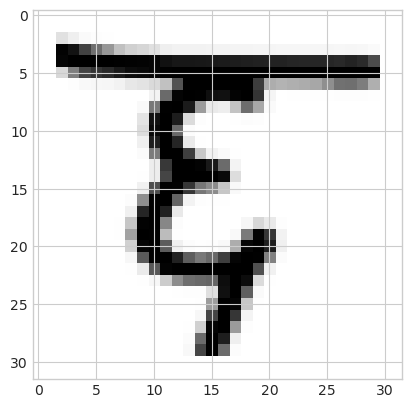

In [61]:
img = tf.keras.utils.load_img(
    "/kaggle/input/nepali-devanagari-for-predicting/predict (1).png", 
    target_size=(img_height, img_width),
    color_mode='grayscale',
)
plt.imshow(img)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = new_model1.predict(img_array)
score = tf.nn.softmax(predictions[0])

class_name = int(class_names[np.argmax(score)])
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(labels_csv.loc[class_name, 'Devanagari label'], 100 * np.max(score))
)

1/1 [==============================] - 0s 103ms/step
This image most likely belongs to ब with a 95.24 percent confidence.


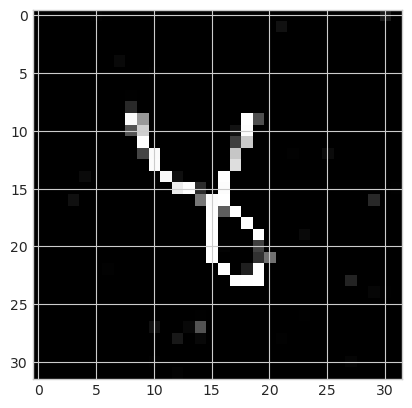

In [62]:
img = tf.keras.utils.load_img(
    "/kaggle/input/nepali-devanagari-for-predicting/four.jpg",
    target_size=(img_height, img_width),
    color_mode='grayscale',
)
plt.imshow(img)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

class_name = int(class_names[np.argmax(score)])
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(labels_csv.loc[class_name, 'Devanagari label'], 100 * np.max(score))
)

1/1 [==============================] - 0s 28ms/step
This image most likely belongs to ब with a 99.83 percent confidence.


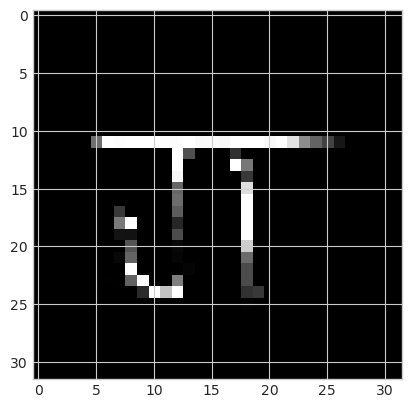

In [63]:
img = tf.keras.utils.load_img(
    "/kaggle/input/nepali-devanagari-for-predicting/ga.jpg",
    target_size=(img_height, img_width),
    color_mode='grayscale',
)
plt.imshow(img)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = new_model1.predict(img_array)
score = tf.nn.softmax(predictions[0])

class_name = int(class_names[np.argmax(score)])
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(labels_csv.loc[class_name, 'Devanagari label'], 100 * np.max(score))
)

1/1 [==============================] - 0s 25ms/step
This image most likely belongs to श with a 67.85 percent confidence.


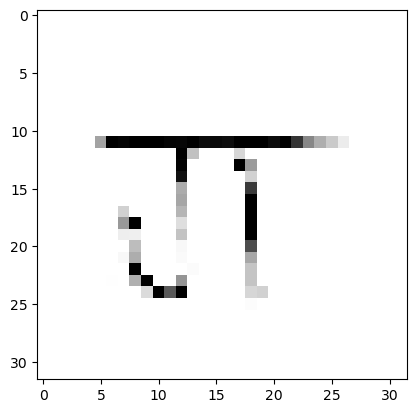

In [36]:
img = tf.keras.utils.load_img(
    "/kaggle/input/nepali-devanagari-for-predicting/ga.jpg", target_size=(img_height, img_width)
)

plt.imshow(img)
img_array = tf.keras.utils.img_to_array(img)
# print(img_array[])
# print(255-img_array)
img_array = 255-img_array
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

class_name = int(class_names[np.argmax(score)])
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(labels_csv.loc[class_name, 'Devanagari label'], 100 * np.max(score))
)

1/1 [==============================] - 0s 24ms/step
This image most likely belongs to ५ with a 82.40 percent confidence.


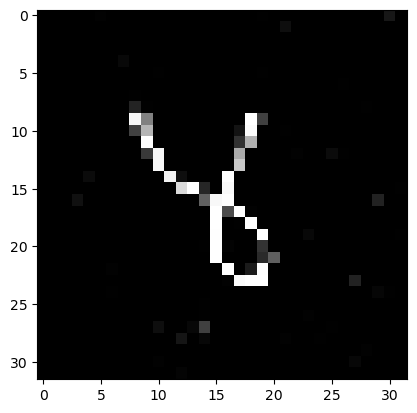

In [37]:
img = tf.keras.utils.load_img(
    "/kaggle/input/nepali-devanagari-for-predicting/four-modified.jpg", target_size=(img_height, img_width)
)
plt.imshow(img)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

class_name = int(class_names[np.argmax(score)])
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(labels_csv.loc[class_name, 'Devanagari label'], 100 * np.max(score))
)

1/1 [==============================] - 0s 25ms/step
This image most likely belongs to श with a 66.95 percent confidence.


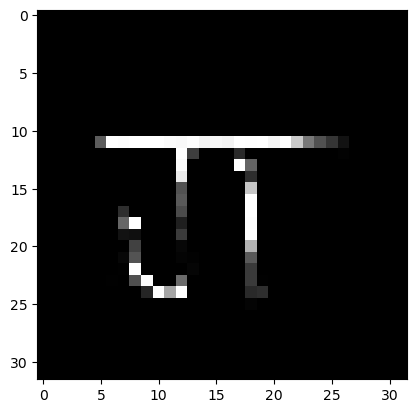

In [38]:
img = tf.keras.utils.load_img(
    "/kaggle/input/nepali-devanagari-for-predicting/ga-modified.jpg", target_size=(img_height, img_width)
)
plt.imshow(img)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

class_name = int(class_names[np.argmax(score)])
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(labels_csv.loc[class_name, 'Devanagari label'], 100 * np.max(score))
)

## Saving Model in HDF5 format

In [40]:
# Save the entire model as a SavedModel.
model.save('my_model.h5')

In [70]:
!zip -r file.zip /kaggle/working/

  adding: kaggle/working/ (stored 0%)
  adding: kaggle/working/.virtual_documents/ (stored 0%)
  adding: kaggle/working/nepali_ocr_model.png (deflated 17%)
  adding: kaggle/working/my_model.h5 (deflated 6%)
  adding: kaggle/working/saved_model/ (stored 0%)
  adding: kaggle/working/saved_model/my_model_ocr/ (stored 0%)
  adding: kaggle/working/saved_model/my_model_ocr/fingerprint.pb (stored 0%)
  adding: kaggle/working/saved_model/my_model_ocr/keras_metadata.pb (deflated 92%)
  adding: kaggle/working/saved_model/my_model_ocr/assets/ (stored 0%)
  adding: kaggle/working/saved_model/my_model_ocr/variables/ (stored 0%)
  adding: kaggle/working/saved_model/my_model_ocr/variables/variables.index (deflated 65%)
  adding: kaggle/working/saved_model/my_model_ocr/variables/variables.data-00000-of-00001 (deflated 6%)
  adding: kaggle/working/saved_model/my_model_ocr/saved_model.pb (deflated 89%)
  adding: kaggle/working/__notebook_source__.ipynb (deflated 44%)
